### Preparing data

In [2]:
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
from torchvision import datasets
from torchvision import transforms as T
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torch.optim import Adam
import torch

all_transforms = T.Compose([T.ToTensor()])

train_set = datasets.FashionMNIST('../fashion_data', train=True, download=True,
                                      transform=all_transforms)
test_set = datasets.FashionMNIST('../fashion_data', train=False,
                                      transform=all_transforms)

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(test_set, batch_size=100)


  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ../fashion_data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../fashion_data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ../fashion_data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../fashion_data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ../fashion_data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../fashion_data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ../fashion_data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../fashion_data/FashionMNIST/raw



### Class representing model

In [3]:
class FashionCNN(nn.Module):
    
    def __init__(self):
        super(FashionCNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

### Model testing

In [4]:
model = FashionCNN()
error = nn.CrossEntropyLoss()
learning_rate = 0.001
optimizer = Adam(model.parameters(), lr=learning_rate)
number_of_epochs = 100
count = 0
predictions_list = []
labels_list = []

import numpy as np
results = np.zeros((number_of_epochs + 1, 3))

for images, labels in train_loader:
  if count >= number_of_epochs:
    break

  train = Variable(images.view(100, 1, 28, 28))
  labels = Variable(labels)
  outputs = model(train)
  loss = error(outputs, labels)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  count += 1
  total = 0
  correct = 0

  for images, labels in test_loader:
    labels_list.append(labels)
    test = Variable(images.view(100, 1, 28, 28))
    outputs = model(test)    
    predictions = torch.max(outputs, 1)[1]
    predictions_list.append(predictions)
    correct += (predictions == labels).sum()    
    total += len(labels)
  
  accuracy = correct * 100 / total
  results[count, 0] = count
  results[count, 1] = loss.data
  results[count, 2] = accuracy
  print("{}, {}, {}%".format(count, loss.data, accuracy))

1, 2.331220865249634, 24.969999313354492%
2, 3.183793306350708, 43.630001068115234%
3, 2.3497495651245117, 53.70000076293945%
4, 1.7552276849746704, 49.720001220703125%
5, 1.4261642694473267, 56.63999938964844%
6, 1.6419662237167358, 67.77999877929688%
7, 0.8631790280342102, 68.8499984741211%
8, 0.7565639615058899, 64.52999877929688%
9, 0.8711646199226379, 64.4800033569336%
10, 0.8379413485527039, 66.5999984741211%
11, 0.9141677021980286, 69.7300033569336%
12, 1.0425759553909302, 70.51000213623047%
13, 0.8153043389320374, 67.9800033569336%
14, 0.9363752603530884, 73.30000305175781%
15, 0.8541344404220581, 73.41000366210938%
16, 0.5742688179016113, 73.55000305175781%
17, 0.6311696767807007, 73.79000091552734%
18, 0.8647928833961487, 75.26000213623047%
19, 0.7804766297340393, 73.23999786376953%
20, 0.5446836948394775, 72.5199966430664%
21, 0.8222665190696716, 75.16000366210938%
22, 0.6193400025367737, 75.23999786376953%
23, 0.646299421787262, 75.20999908447266%
24, 0.597373902797699, 75.

### Ploting data

Loss dependence on the number of epochs

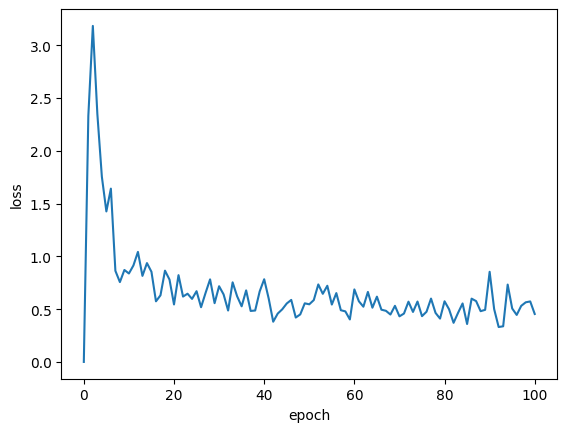

In [5]:
import matplotlib.pyplot as plt

plt.plot(results[:, 0], results[:, 1])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

Accuracy dependence on the number of epochs

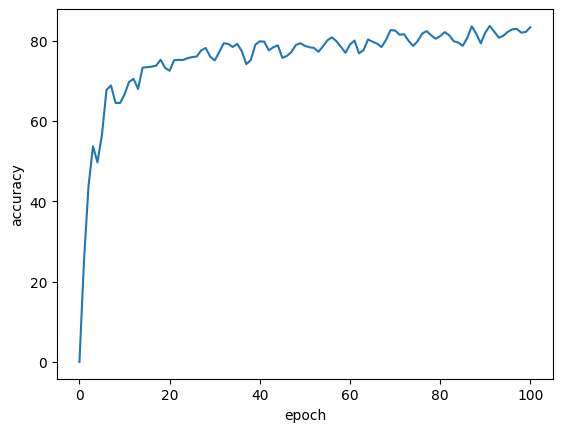

In [6]:
plt.plot(results[:, 0], results[:, 2])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()